<center><h2>Isolation Forest</h2>From scratch</center>

#### Libraries

In [1]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('autosavetime/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from pprint import pprint
import seaborn as sns
import pdb
sns.set_style(style="whitegrid")



## Sample data

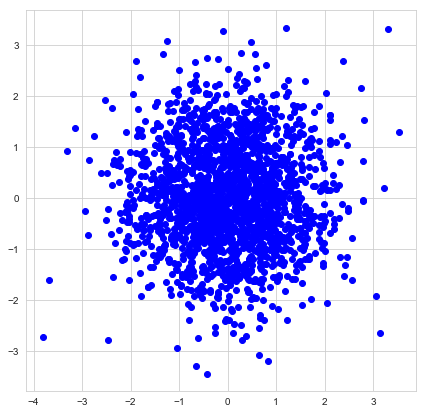

In [3]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 2000
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
X = pd.DataFrame(X,columns=['feat1','feat2'])
plt.figure(figsize=(7,7))
plt.plot(x,y,'bo');

## Isolation tree
 1. Get sample of data
 2. Randomly select dimension
 3. Randomly pick a value in the dimension
 4. Split the data


<img src="images/tree_pseudo.png" alt="Drawing" style="width: 400px;"/>

### Sample the data

In [4]:
def select_point(data):
    n_samples,n_columns = data.shape
    return data.iloc[random.choice(list(range(n_samples)))]

In [5]:
select_point(X)

feat1   -2.507582
feat2   -0.433486
Name: 1169, dtype: float64

### Select a dimension

In [6]:
def select_feature(data): 
    return random.choice(data.columns)

### Select a value in the dimension

In [7]:
def select_value(data,feat):
    mini = data[feat].min()
    maxi = data[feat].max()
    return (maxi-mini)*np.random.random()+mini
    

In [8]:
select_value(X,select_feature(X))

1.2106357731560884

### Split Data

In [9]:
def split_data(data, split_column, split_value):

    data_below = data[data[split_column] <= split_value]
    data_above = data[data[split_column] >  split_value]
    
    return data_below, data_above

In [10]:
a,b =split_data(X,
           select_feature(X),
          select_value(X,select_feature(X)))

### Isolation Tree

In [55]:
def isolation_tree(df,counter=0, max_depth=50,random_subspace=False):
        # data preparations
    if counter == 0:
        global COLUMN_HEADERS   
        COLUMN_HEADERS = df.columns
        data = df
        
        global counter_hist
        
        global instance
        instance = select_point(data)
        


        
    else:
        data = df
       
    # Strop criteria    
    if (data.shape[0]==1):
        return 'isolated'
    elif counter == max_depth:
        return 'max_depth'
    
    else:
        # Counter
        counter +=1
        counter_hist.append(counter)
        
        # Select feature
        split_column = select_feature(data)
        
        # Select value
        split_value = select_value(data,split_column)

        # Split data
        data_below, data_above = split_data(data,split_column,split_value)
        
        
        
        # instantiate sub-tree      
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}
        
        
        # find answers (recursion)
        below_answer='below'
        above_answer = 'above'
        if (data_below == instance).all(1).any():
            below_answer = isolation_tree(data_below, counter,max_depth)
            sub_tree[question].append(below_answer)
            
        else:
            above_answer = isolation_tree(data_above, counter, max_depth)
            sub_tree[question].append(above_answer)
        

        return sub_tree
        
    

In [62]:
counter_hist = []
tree = isolation_tree(X.head(2))

In [63]:
pprint(tree)

{'feat2 <= 2.4804026248650457': ['isolated']}


In [64]:
tree.values()

dict_values([['isolated']])

In [65]:
counter_hist

[1]

In [76]:
list(tree.keys())[0]

'feat2 <= 2.4804026248650457'

In [66]:
question = list(tree.keys())[0]
feature_name, comparison_operator, value = question.split()

In [67]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
        print(answer)
    else:
        answer = tree[question][1]
        print(answer)
    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [77]:
classify_example(X.iloc[1],tree)

isolated


'isolated'

# Forest

 1. For each tree
 2. Sample Data
 3. Fit tree

<img src="images/forest_pseudo.png" alt="Drawing" style="width: 400px;"/>

In [84]:
def isolation_forest(df,n_trees=5, max_depth=5, subspace=1):
    forest = []

    for i in range(n_trees):
        # Sample the subspace
        df = df.sample(frac=subspace)

        # Fit tree
        tree = isolation_tree(df)
        
        # Save tree to forest
        forest.append(tree)
    
    return forest
        
        

In [86]:
isolation_forest(X);


## Path Length

<img src="images/path_pseudo.png" alt="Drawing" style="width: 400px;"/>